## **Navya Mamoria**
#### **Task #5 : Exploratory Data Analysis - Retail**
* Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
* As a business manager, try to find out the weak areas where you can
work to make more profit.
* What all business problems you can derive by exploring the data?
* Dataset: https://bit.ly/3i4rbWl

###Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

###Loading the Dataset

In [2]:
df = pd.read_csv('SampleSuperstore.csv') 
df.head()    

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


###Data Preprocessing

In [3]:
df.shape

(9994, 13)

In [8]:
#Displaying information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
#Displaying Summary
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
#For checking null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [12]:
# checking for duplicate values
df.duplicated().sum()

17

In [13]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [14]:
# Dropping the duplicates
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.duplicated().sum()

0

In [16]:
# Removing the columns such as postal code which are unnecessary
df = df.drop(['Postal Code'],axis=1)

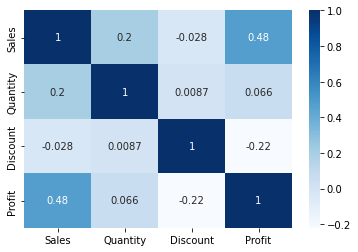

In [17]:
# Finding the correlations between the columns and visualising using heatmaps
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='Blues')


###Exploratory Data Analysis

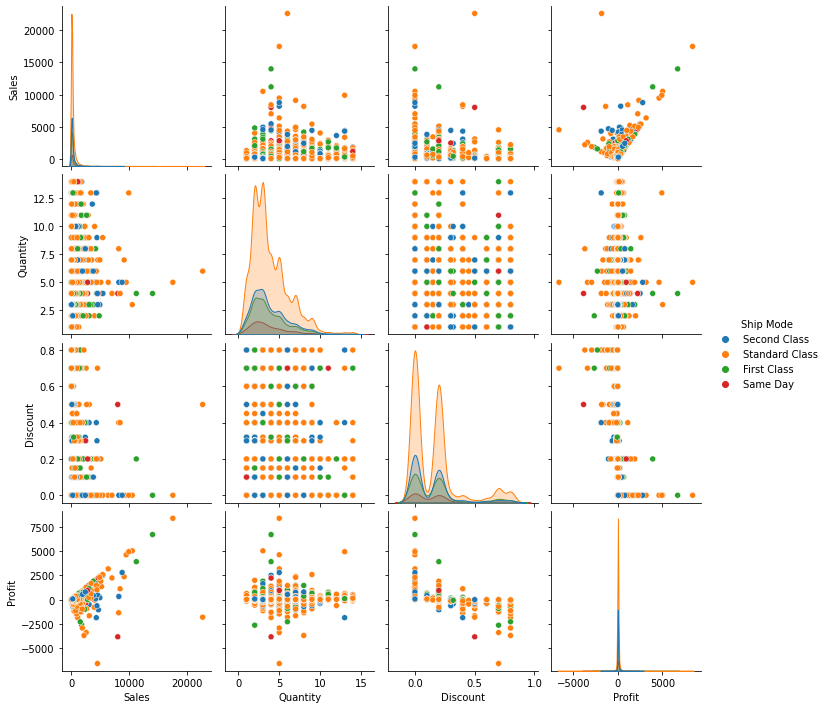

In [26]:
# visualizing the dataset as a whole using the pair plot
sns.pairplot(df,hue='Ship Mode',palette='tab10')

In [31]:
#Counts values for Ship Mode
df["Ship Mode"].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

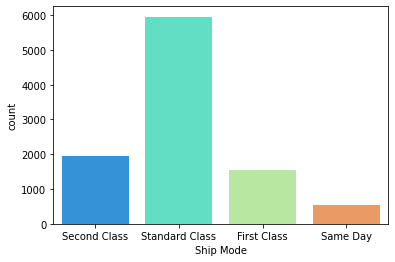

In [32]:
sns.countplot(x=df['Ship Mode'],palette='rainbow')

So the most preferred ship mode is Standard Class and least preferred is Same Day.

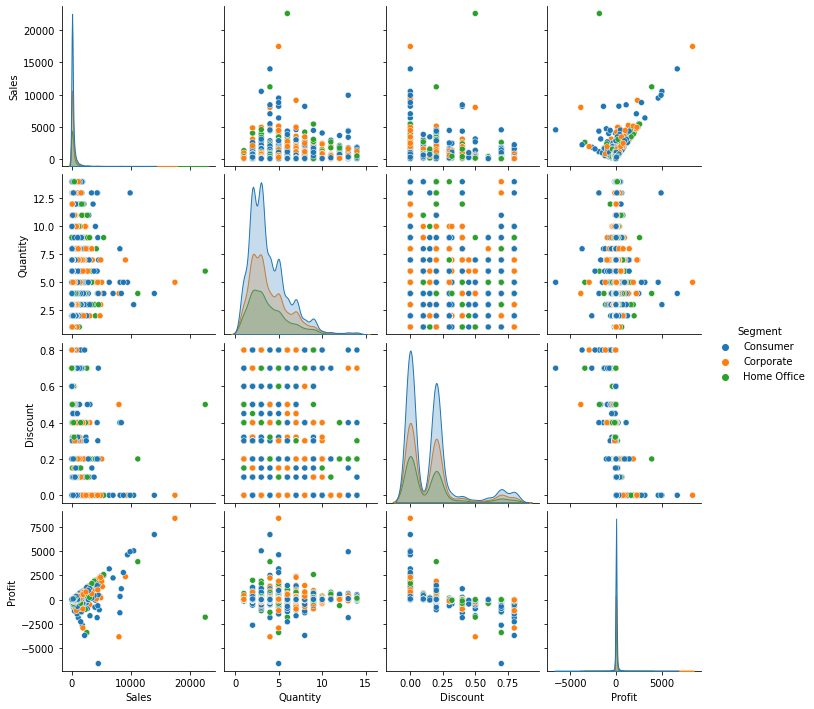

In [36]:
sns.pairplot(df,hue='Segment',palette='tab10')

In [37]:
# Counts values for Segment
df['Segment'].value_counts()       

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

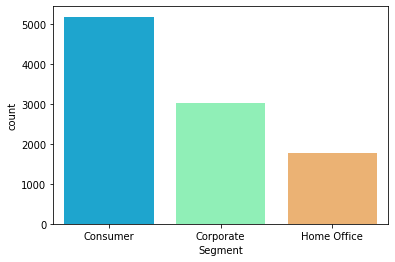

In [38]:
sns.countplot(x =df['Segment'], palette = 'rainbow')

Most of the people belong to the Consumer Class

In [39]:
df['Country'].value_counts()

United States    9977
Name: Country, dtype: int64

As all are from US this column can be dropped.

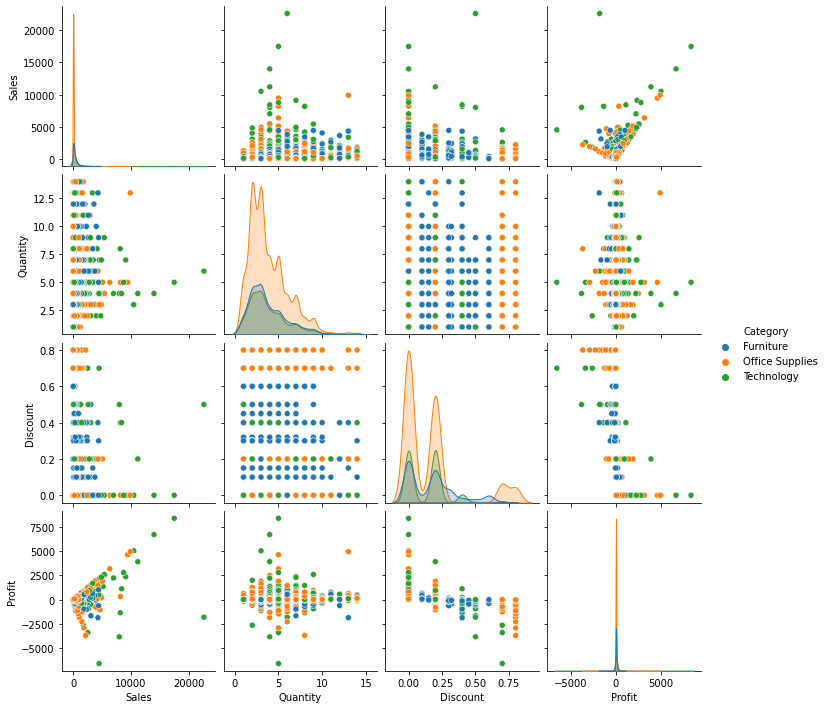

In [40]:
sns.pairplot(df,hue='Category',palette='tab10')

In [41]:
# Value-count for Category
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

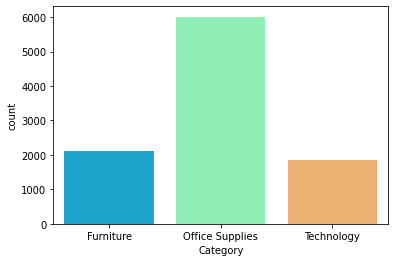

In [42]:
sns.countplot(x=df['Category'],palette='rainbow')

Most of the categories belong to Office Supplies and least belong to Technology.

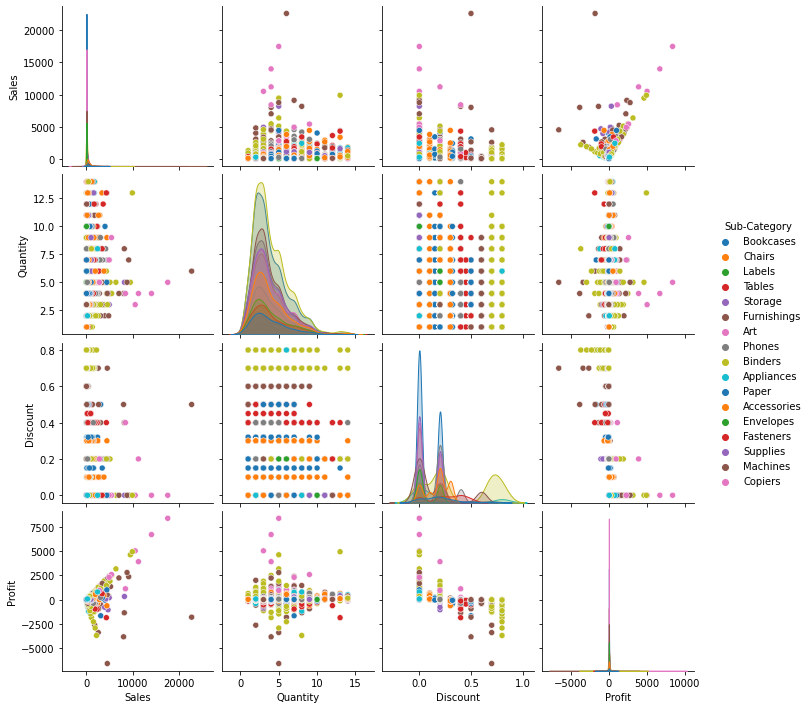

In [44]:
sns.pairplot(df,hue='Sub-Category',palette='tab10')

In [45]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

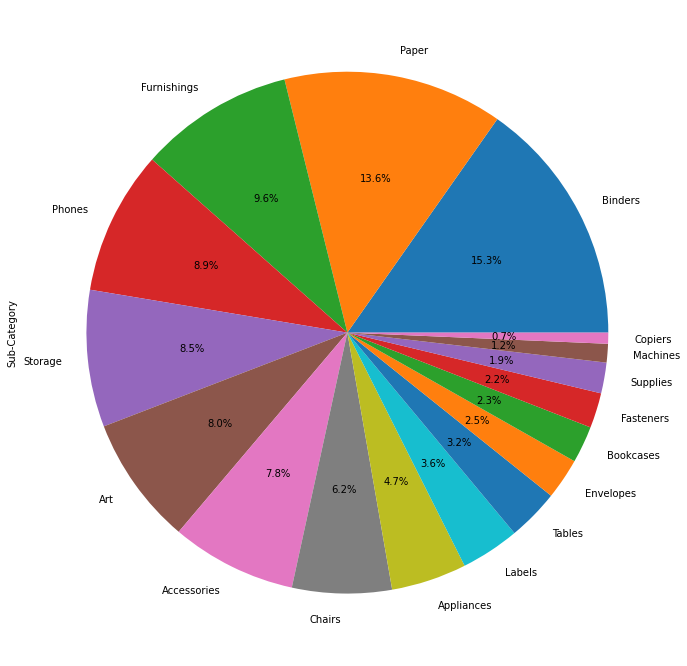

In [46]:
plt.figure(figsize=(15,12))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

Maximum are from Binders , Paper , Furnishings , Phones and Storage

In [48]:
#Value-count for City
df['City'].value_counts(10)

New York City      0.091611
Los Angeles        0.074772
Philadelphia       0.053724
San Francisco      0.050717
Seattle            0.042498
                     ...   
Glenview           0.000100
Missouri City      0.000100
Rochester Hills    0.000100
Palatine           0.000100
Manhattan          0.000100
Name: City, Length: 531, dtype: float64

Text(0.5, 1.0, 'Top 10 Cities having most order placed')

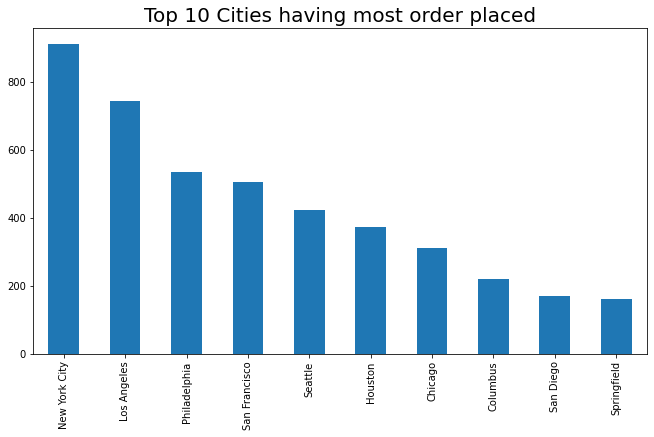

In [53]:
df['City'].value_counts().head(10).plot(kind = 'bar',figsize=(11,6))
plt.title('Top 10 Cities having most order placed',size=20)

Most number of order were placed in New York City.

In [54]:
#Value-count for State
df['State'].value_counts().head()

California      1996
New York        1127
Texas            983
Pennsylvania     586
Washington       502
Name: State, dtype: int64

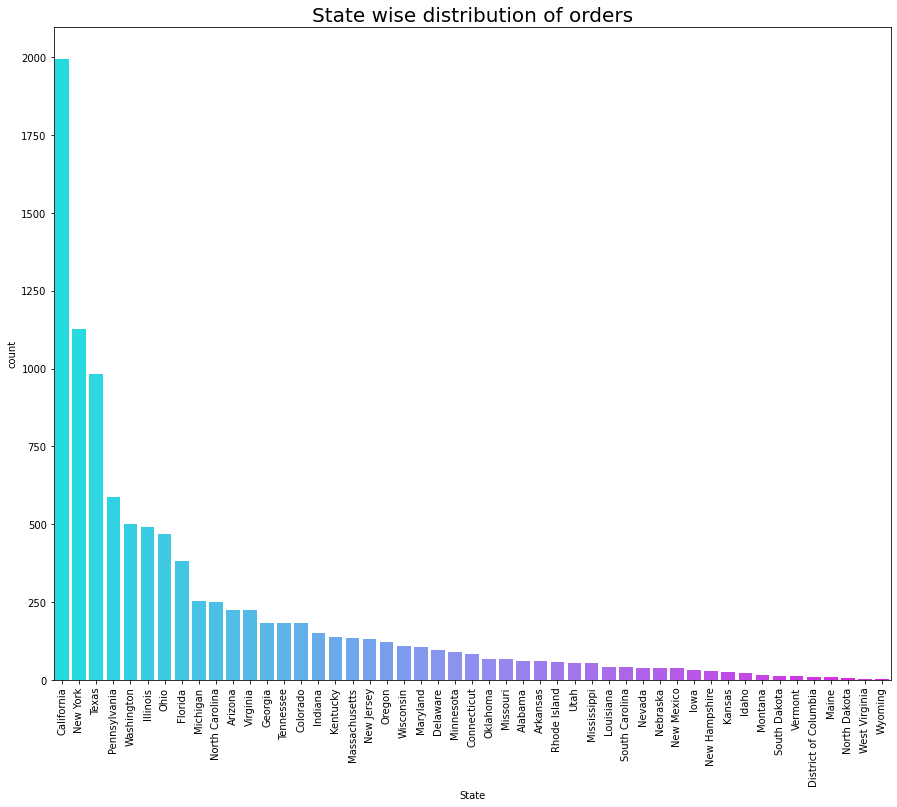

In [59]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=df,palette='cool',order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title('State wise distribution of orders',size=20)
plt.show()

In case of State, most no of order were placed in California

In [60]:
#Value_count for Region
df['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

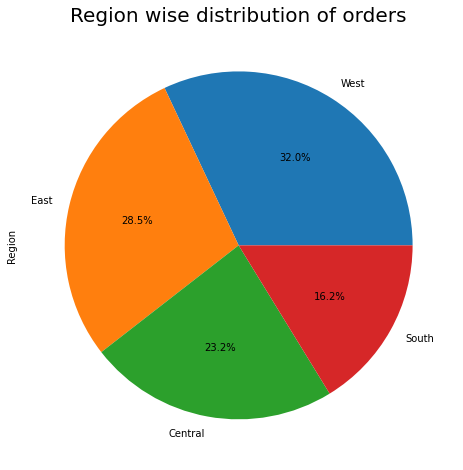

In [62]:
plt.figure(figsize=(10,8))
df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.title('Region wise distribution of orders',size=20)
plt.show()

West Region has the maximum sale of 32% followed by East Region with a sale of 28.5%

In [64]:
category_sum=df.groupby("Category").sum()
category_sum

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,741306.3133,8020,368.59,18421.8137
Office Supplies,718735.2440,22861,946.20,122364.6608
Technology,836154.0330,6939,244.40,145454.9481


Text(0, 0.5, 'Profit and Sales')

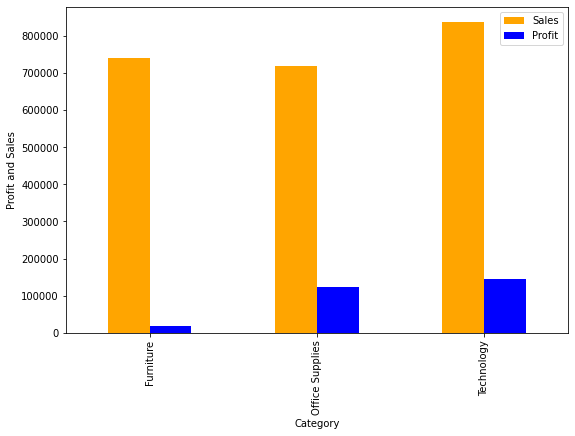

In [67]:
#Plotting a bar plot for Sales and Profit with respect to the different categories
category_sum[['Sales', 'Profit']].plot.bar(color=['orange','blue'],figsize=(9,6))
plt.ylabel('Profit and Sales')

**As a business manager, try to find out the weak areas where you can work to make more profit?**
* Technology has high profit and sale.
* Furniture has moderate Sales but less Profi
* Office Supplies have least sales but good profit.

In [70]:
sub_category_sum=df.groupby("Sub-Category").sum()
sub_category_sum

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Accessories,167380.3180,2976,60.80,41936.6357
Appliances,107532.1610,1729,77.60,18138.0054
Art,27107.0320,2996,59.60,6524.6118
Binders,203409.1690,5971,566.20,30228.0003
Bookcases,114879.9963,868,48.14,-3472.5560
Chairs,327777.7610,2351,104.70,26567.1278
Copiers,149528.0300,234,11.00,55617.8249
Envelopes,16476.4020,906,20.40,6964.1767
Fasteners,3024.2800,914,17.80,949.5182


Text(0.5, 1.0, 'Profit/loss & Sales across Sub-Category')

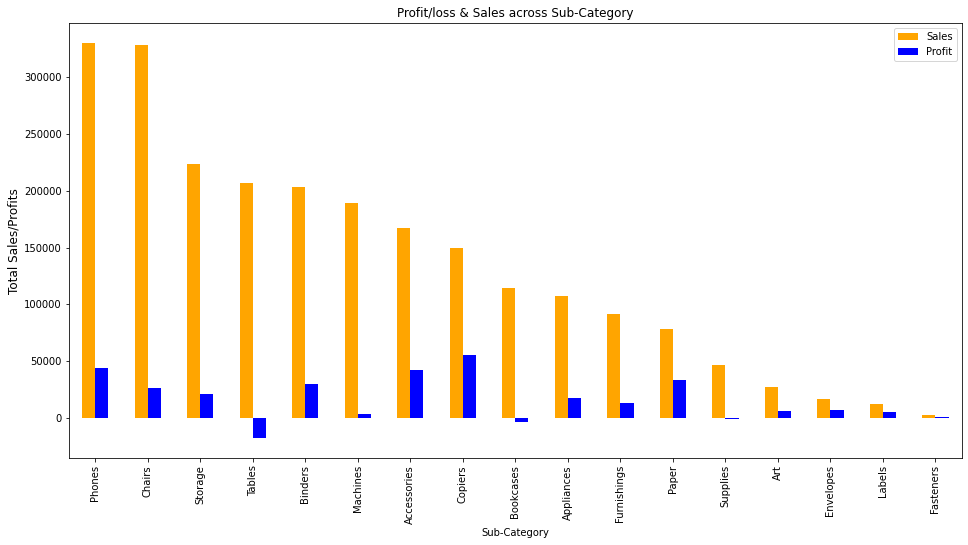

In [72]:
#Plotting a bar plot for Sales and Profit with respect to the different sub-categories
sub_category_sum[['Sales', 'Profit']].sort_values(by='Sales',ascending=False).plot(kind = 'bar',color=['orange','blue'], figsize = [16,8])
plt.ylabel('Total Sales/Profits',fontsize = 12)
plt.title('Profit/loss & Sales across Sub-Category')

We can observe that:
* Phones sub-category have high sales and profit.
* Chairs have high sales but less profit compared to phones.
* Copiers have moderate sales but highest profit.
* Tables and Bookmarks sub-categories facing huge loss although they have moderate sales.

Text(0, 0.5, 'Profit/loss & Sales')

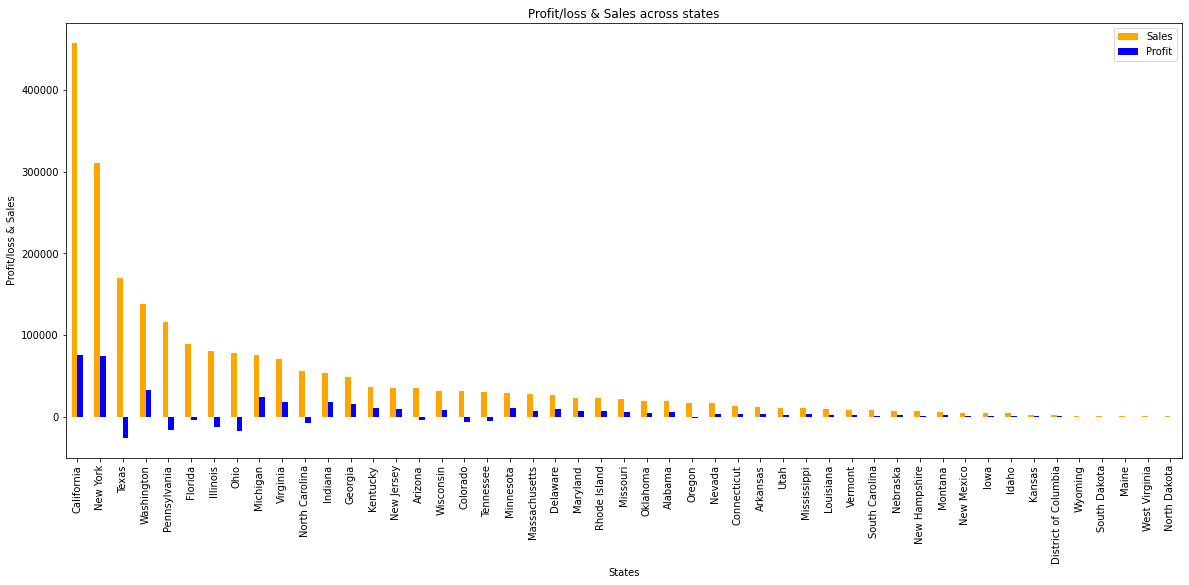

In [76]:
df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False).plot.bar(color=['orange','blue'],figsize=(20,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')


We see that:
* Highest profit is in California and New York
* There is loss for Texas, Pennsylvania, Ohio and Illinois.

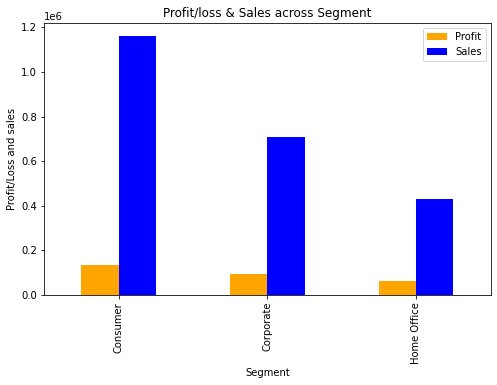

In [78]:
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['orange','blue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.title('Profit/loss & Sales across Segment')
plt.show()

Profit and sales are maximum in consumer segment and minimum in Home Office segment

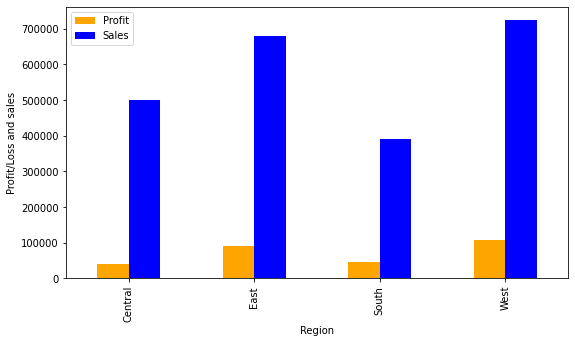

In [79]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['orange','blue'],figsize=(9,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

Profit and sales are maximum in west region and minimum in south and central region

###Profit Vs Discount

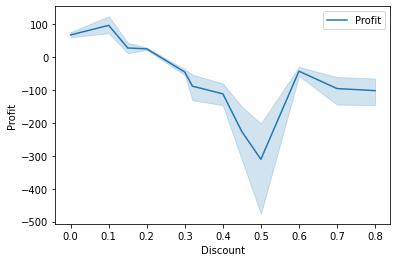

In [80]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

###Quantity Vs Profit

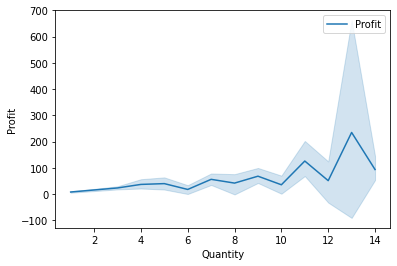

In [81]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()


The graphs indicate that if we give more discount on our products, sales increases but profit decreases.

###Conclusion

* To make more profit we should limit the sales of furniture and increase that of technology and office suppliers as they yield more profit.
* In the sub-gategories, we are facing huge loss on the sale of tables and bookmarks so their sale should be limited.
* Sales should be increased in the states like 'New York' and 'California' to make more profits and limited in states like 'Texas' and 'Ohio' as they are facing loss.